In [ ]:
import numpy as np

In [ ]:
# 3-dimensional array 
array3D = np.array([[[ 0,  1,  2],
                     [ 3,  4,  5],
                     [ 6,  7,  8]],
  
                    [[ 9, 10, 11],
                     [12, 13, 14],
                     [15, 16, 17]],
 
                    [[18, 19, 20],
                     [21, 22, 23],
                     [24, 25, 26]]])
 
print(array3D)
print("shape :" ,array3D.shape)
 
print("\naccessing element :" +str(array3D[0, 1, 0]))
print("accessing elements of a row and a column of an array:"
      +str(array3D[:, 1, 0]))
print("accessing sub part of an array :" +str(array3D[1]))

In [ ]:
# img1 = np.array(Image.open('car.png'))
# # print(type(img1))
# # print(img1.shape)
# b = img1.reshape(-1, 3)
# for triplet in b:
#     pass
# print(triplet)

# c1 = np.array([255, 0, 0])
# c2 = np.array([0, 0, 0])
# c3 = np.array([255, 255, 255])

def euclidean_distance(vx, vy):
    return sum((y-x)**2 for x, y in zip(vx, vy)) ** 0.5

print(euclidean_distance([1,2,3],[4,8,10]))

In [ ]:
k = 3 
clusters = [[] for _ in range(k)]
# print(clusters)


In [12]:
my_list = ['apple', 'banana', 'orange']

for i, fruit in enumerate(my_list):
    print(type(i))


<class 'int'>
<class 'int'>
<class 'int'>


In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


def euclidean_distance(vx, vy):
    return sum((y-x)**2 for x, y in zip(vx, vy)) ** 0.5

def k_means_a(input , given_means , k):
    clusters = [[] for _ in range(k)]
    b = input.reshape(-1, 3)
    for vector in b:
        distances = [euclidean_distance(vector, centroid) for centroid in given_means]
        closest_cluster = np.argmin(distances)
        clusters[closest_cluster].append(vector)

    output = np.zeros_like(b)
    for i, cluster in enumerate(clusters):
        fill = given_means[i]
        if cluster:
            for pixel in cluster:
                for index, p in enumerate(b):
                    if np.all(p == pixel):
                        output[index] = fill
    return output

if __name__ == '__main__':
    img1 = np.array(Image.open('car.png'))
    img2 = np.array(Image.open('flower.png'))

    given_means = np.array([[255, 0, 0],
                            [0, 0, 0],
                            [255, 255, 255]])
    
    output_image = k_means_a(img1, given_means, k=3)
    plt.imshow(output_image.reshape(img1.shape))
    plt.axis('off')
    plt.show()


KeyboardInterrupt: 

In [12]:
from PIL import Image
import numpy as np

def euclidean_distance(vx, vy):
    return np.sqrt(np.sum((vy - vx) ** 2))

def update_centroids(clusters):
    return [np.mean(cluster, axis=0) for cluster in clusters]

def clustering(input, k, max_iterations=100):
    # Initialize centroids randomly
    centroids = [input[i] for i in np.random.choice(len(input), k, replace=False)]
    
    for _ in range(max_iterations):
        # Assign each point to the nearest centroid
        clusters = [[] for _ in range(k)]
        for vector in input:
            distances = [euclidean_distance(vector, centroid) for centroid in centroids]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].append(vector)
        
        # Update centroids based on the mean of the points in each cluster
        new_centroids = update_centroids(clusters)
        
        # Check for convergence
        if np.all(np.array(centroids) == np.array(new_centroids)):
            break
        
        centroids = new_centroids
    
    return clusters, centroids

def replace_with_mean(image_data, clusters, centroids):
    new_image_data = np.copy(image_data)
    for i, cluster in enumerate(clusters):
        for pixel in cluster:
            new_image_data[np.all(image_data == pixel, axis=1)] = centroids[i]
    return new_image_data

if __name__ == '__main__':
    # Load image
    img = np.array(Image.open('car.png'))
    
    # Reshape image array
    pixels = img.reshape(-1, 3)
    
    # Perform clustering
    k = 3  # Number of clusters
    clusters, centroids = clustering(pixels, k)
    
    # Replace pixel values with cluster means
    new_pixels = replace_with_mean(pixels, clusters, centroids)
    
    # Reshape new pixel array to image shape
    new_img = new_pixels.reshape(img.shape)
    
    # Create PIL image and display/save it
    new_image = Image.fromarray(np.uint8(new_img))
    new_image.show()
    # new_image.save('output_image.png')


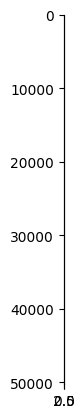

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img1 = np.array(Image.open('car.png'))
# print(type(img1))
# print(img1.shape)
b = img1.reshape(-1, 3)
for triplet in b:
    pass

import numpy as np

def euclidean_distance(vx, vy):
    return sum((y-x)**2 for x, y in zip(vx, vy)) ** 0.5

k = 3

def clustering(input,k):

    clusters = [[] for _ in range(k)]
    c1 = np.array([255, 0, 0])
    c2 = np.array([0, 0, 0])
    c3 = np.array([255, 255, 255])
    centroids = [c1, c2, c3]

    for vector in input:
        distances = [euclidean_distance(vector, centroid) for centroid in [c1, c2, c3]]
        closest_cluster = np.argmin(distances)
        clusters[closest_cluster].append(vector)
    
    # Calculate mean values for each cluster
    mean_values = [np.mean(cluster, axis=0) for cluster in clusters]

    # Assign mean values to pixels in each cluster
    filled_image = np.zeros_like(input)
    for cluster_idx, cluster in enumerate(clusters):
        mean_value = mean_values[cluster_idx]
        for pixel in cluster:
            distances = [euclidean_distance(pixel, centroid) for centroid in centroids]
            closest_cluster = np.argmin(distances)
            filled_image[np.all(input == pixel, axis=1)] = mean_values[closest_cluster]

    return filled_image



if __name__ == '__main__':
    img1 = np.array(Image.open('car.png'))


    b = img1.reshape(-1, 3)
    img_result = clustering(b,3)
    # new_img = img_result.reshape(img1.shape)
    
    # Create PIL image and display/save it
    # new_image = Image.fromarray(np.uint8(new_img))
    # new_image.show()
    plt.imshow(img_result)
    plt.show()

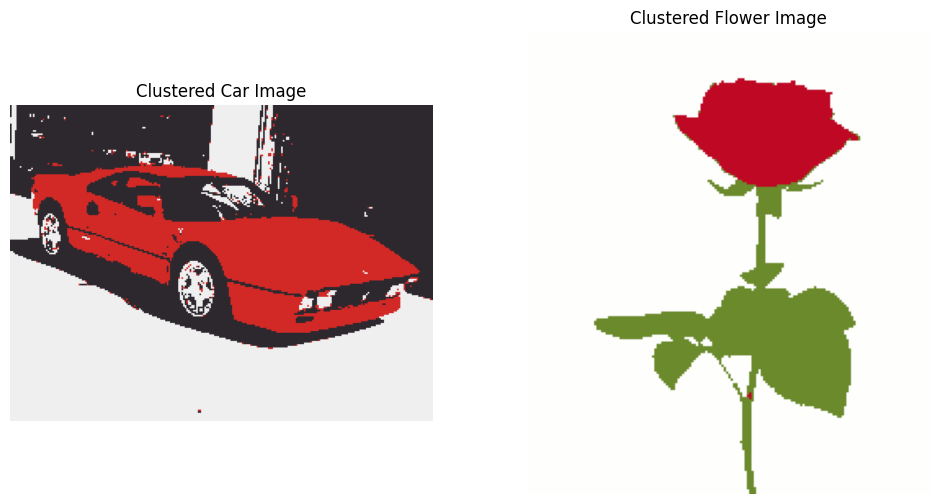

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(vx, vy):
    return np.sqrt(np.sum((vy - vx) ** 2))

def kmeans_clustering(image, k, initial_means, iterations=5):
    # Flatten the image into an array of RGB vectors
    pixels = np.array(image).reshape(-1, 3)
    num_pixels = pixels.shape[0]

    # Initialize cluster means
    cluster_means = np.array(initial_means)

    for _ in range(iterations):
        # Assign each pixel to the nearest cluster
        labels = np.argmin(np.array([np.linalg.norm(pixels - mean, axis=1) for mean in cluster_means]), axis=0)

        # Update cluster means
        for i in range(k):
            cluster_points = pixels[labels == i]
            if len(cluster_points) > 0:
                cluster_means[i] = np.mean(cluster_points, axis=0)

    # Replace each pixel with the cluster center it belongs to
    clustered_image = np.array([cluster_means[label] for label in labels], dtype=np.uint8).reshape(image.shape)

    return clustered_image

if __name__ == '__main__':
    # Load input images
    car_image = np.array(Image.open('car.png'))
    flower_image = np.array(Image.open('flower.png'))

    # Perform K-means clustering with initial cluster means
    initial_means = [[255, 0, 0], [0, 0, 0], [255, 255, 255]]
    clustered_car = kmeans_clustering(car_image, 3, initial_means)
    clustered_flower = kmeans_clustering(flower_image, 3, initial_means)

    # Visualize the clustered images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(clustered_car)
    axes[0].set_title('Clustered Car Image')
    axes[0].axis('off')
    axes[1].imshow(clustered_flower)
    axes[1].set_title('Clustered Flower Image')
    axes[1].axis('off')
    plt.show()


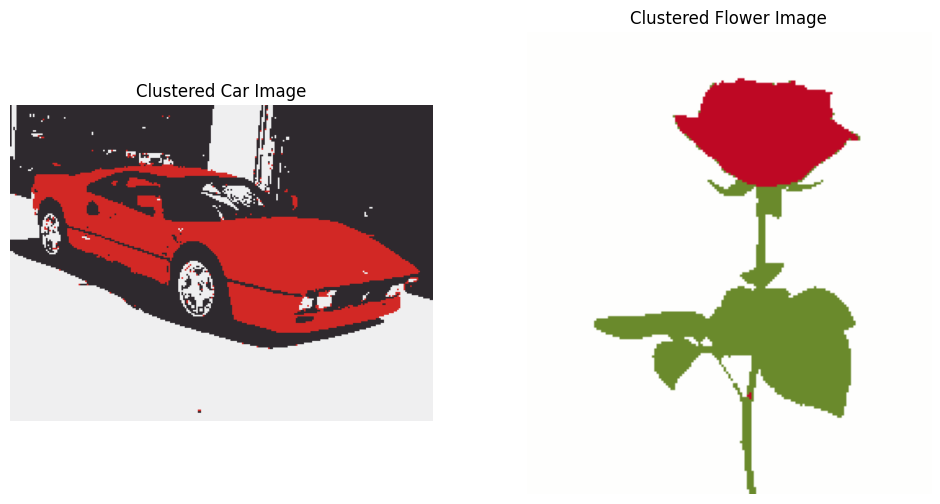

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def kmeans_clustering(image, k, initial_means, iterations=5):
    pixels = np.array(image).reshape(-1, 3)
    cluster_means = np.array(initial_means)

    for _ in range(iterations):
        labels = np.argmin(np.linalg.norm(pixels[:, None] - cluster_means, axis=2), axis=1)
        cluster_means = np.array([pixels[labels == i].mean(axis=0) for i in range(k)])

    clustered_image = np.array([cluster_means[label] for label in labels], dtype=np.uint8).reshape(image.shape)
    return clustered_image

if __name__ == '__main__':
    car_image = np.array(Image.open('car.png'))
    flower_image = np.array(Image.open('flower.png'))

    initial_means = [[255, 0, 0], [0, 0, 0], [255, 255, 255]]
    clustered_car = kmeans_clustering(car_image, 3, initial_means)
    clustered_flower = kmeans_clustering(flower_image, 3, initial_means)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(clustered_car)
    axes[0].set_title('Clustered Car Image')
    axes[0].axis('off')
    axes[1].imshow(clustered_flower)
    axes[1].set_title('Clustered Flower Image')
    axes[1].axis('off')
    plt.show()


/tmp/ipykernel_167067/842149702.py:14: RuntimeWarning: Mean of empty slice.
  cluster_means = np.array([pixels[labels == i].mean(axis=0) for i in range(k)])


Lowest cost: 355583.1885350217
Highest cost: 8357463.739443778
Best clustering for car image (Lowest cost):


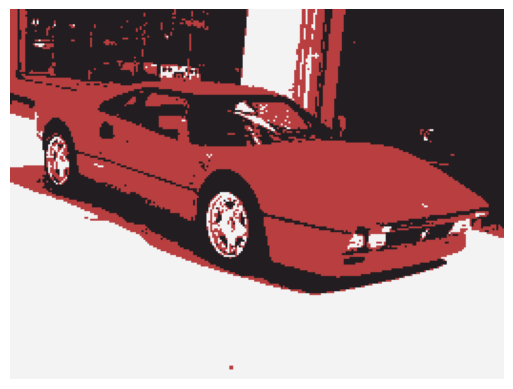

Worst clustering for car image (Highest cost):


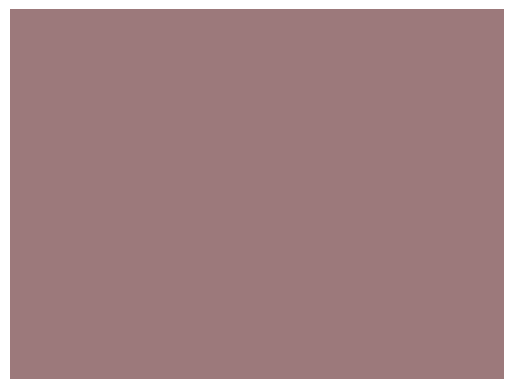

Best clustering for flower image (Lowest cost):


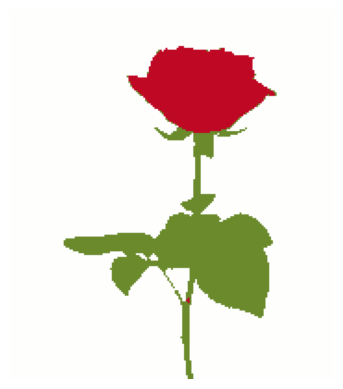

Worst clustering for flower image (Highest cost):


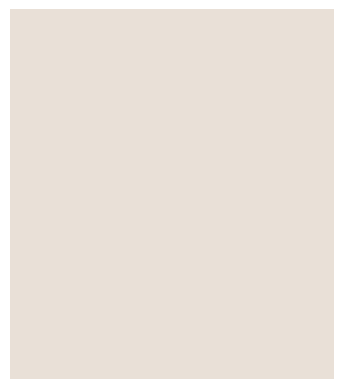

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(vx, vy):
    return np.sqrt(np.sum((vy - vx) ** 2))

def kmeans_clustering(image, k, initial_means, iterations=5):
    pixels = np.array(image).reshape(-1, 3)
    cluster_means = np.array(initial_means)

    for _ in range(iterations):
        labels = np.argmin(np.linalg.norm(pixels[:, None] - cluster_means, axis=2), axis=1)
        cluster_means = np.array([pixels[labels == i].mean(axis=0) for i in range(k)])

    return cluster_means, labels

def compute_cost(image, cluster_means, labels):
    pixels = np.array(image).reshape(-1, 3)
    total_cost = np.sum([euclidean_distance(pixels[i], cluster_means[labels[i]]) for i in range(len(pixels))])
    return total_cost

def visualize_clustered_image(image, cluster_means, labels):
    clustered_image = np.array([cluster_means[label] for label in labels], dtype=np.uint8).reshape(image.shape)
    plt.imshow(clustered_image)
    plt.axis('off')
    plt.show()

    
if __name__ == '__main__':
    # Load input images
    car_image = np.array(Image.open('car.png'))
    flower_image = np.array(Image.open('flower.png'))

    # Parameters
    k = 3
    N = 30
    min_cost = float('inf')
    max_cost = float('-inf')
    best_clustering = None
    worst_clustering = None

    # Perform K-means clustering with random initializations
    for _ in range(N):
        # Randomly initialize cluster means
        initial_means = np.random.uniform(0, 255, size=(k, 3))
        
        # Perform clustering
        cluster_means_car, labels_car = kmeans_clustering(car_image, k, initial_means)
        cluster_means_flower, labels_flower = kmeans_clustering(flower_image, k, initial_means)
        
        # Compute cost for each clustering output
        cost_car = compute_cost(car_image, cluster_means_car, labels_car)
        cost_flower = compute_cost(flower_image, cluster_means_flower, labels_flower)
        
        # Update min and max cost and corresponding clustering outputs
        if cost_car < min_cost:
            min_cost = cost_car
            best_clustering_car = (cluster_means_car, labels_car)
        if cost_car > max_cost:
            max_cost = cost_car
            worst_clustering_car = (cluster_means_car, labels_car)
        
        if cost_flower < min_cost:
            min_cost = cost_flower
            best_clustering_flower = (cluster_means_flower, labels_flower)
        if cost_flower > max_cost:
            max_cost = cost_flower
            worst_clustering_flower = (cluster_means_flower, labels_flower)

    print("Lowest cost:", min_cost)
    print("Highest cost:", max_cost)
    # Visualize the best and worst clustering outputs for car image
    best_cluster_means_car, best_labels_car = best_clustering_car
    worst_cluster_means_car, worst_labels_car = worst_clustering_car
    
    print("Best clustering for car image (Lowest cost):")
    visualize_clustered_image(car_image, best_cluster_means_car, best_labels_car)
    
    print("Worst clustering for car image (Highest cost):")
    visualize_clustered_image(car_image, worst_cluster_means_car, worst_labels_car)

    # Visualize the best and worst clustering outputs for flower image
    best_cluster_means_flower, best_labels_flower = best_clustering_flower
    worst_cluster_means_flower, worst_labels_flower = worst_clustering_flower
    
    print("Best clustering for flower image (Lowest cost):")
    visualize_clustered_image(flower_image, best_cluster_means_flower, best_labels_flower)
    
    print("Worst clustering for flower image (Highest cost):")
    visualize_clustered_image(flower_image, worst_cluster_means_flower, worst_labels_flower)

    # Visualize the best and worst clustering outputs
    # (You can use the previous visualization code)


Best clustering for car image (Lowest cost):


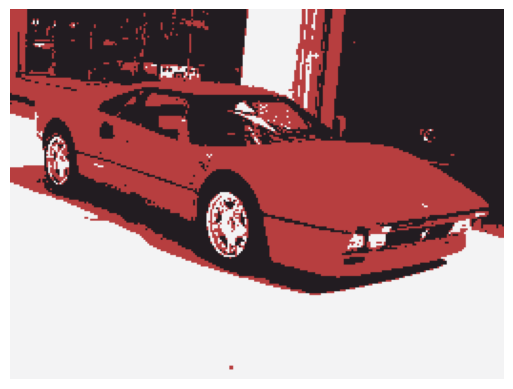

Worst clustering for car image (Highest cost):


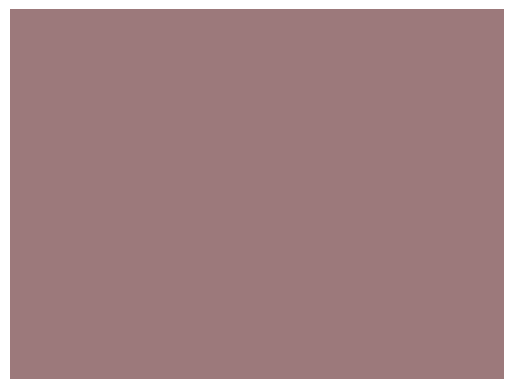

NameError: name 'worst_clustering_flower' is not defined

In [8]:
import matplotlib.pyplot as plt

def visualize_clustered_image(image, cluster_means, labels):
    clustered_image = np.array([cluster_means[label] for label in labels], dtype=np.uint8).reshape(image.shape)
    plt.imshow(clustered_image)
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    # Load input images
    car_image = np.array(Image.open('car.png'))
    flower_image = np.array(Image.open('flower.png'))

    # Visualize the best and worst clustering outputs for car image
    best_cluster_means_car, best_labels_car = best_clustering_car
    worst_cluster_means_car, worst_labels_car = worst_clustering_car
    
    print("Best clustering for car image (Lowest cost):")
    visualize_clustered_image(car_image, best_cluster_means_car, best_labels_car)
    
    print("Worst clustering for car image (Highest cost):")
    visualize_clustered_image(car_image, worst_cluster_means_car, worst_labels_car)

    # Visualize the best and worst clustering outputs for flower image
    best_cluster_means_flower, best_labels_flower = best_clustering_flower
    worst_cluster_means_flower, worst_labels_flower = worst_clustering_flower
    
    print("Best clustering for flower image (Lowest cost):")
    visualize_clustered_image(flower_image, best_cluster_means_flower, best_labels_flower)
    
    print("Worst clustering for flower image (Highest cost):")
    visualize_clustered_image(flower_image, worst_cluster_means_flower, worst_labels_flower)


In [15]:
from PIL import Image
import numpy as np

def euclidean_distance(vx, vy):
    return np.linalg.norm(vx - vy)

def k_means_clustering(input_image, initial_means, k, iterations=5):
    # Flatten the input image into a 2D array of RGB vectors
    pixels = np.array(input_image).reshape((-1, 3))
    
    # Initialize cluster means with the provided initial means
    cluster_means = np.array(initial_means)
    
    # Perform K-means iterations
    for _ in range(iterations):
        # Initialize clusters
        clusters = [[] for _ in range(k)]
        
        # Assign each pixel to the nearest cluster mean
        for pixel in pixels:
            distances = [euclidean_distance(pixel, mean) for mean in cluster_means]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].append(pixel)
        
        # Update cluster means
        for i in range(k):
            if clusters[i]:
                cluster_means[i] = np.mean(clusters[i], axis=0)
    
    # Create the output image by replacing each pixel with its corresponding cluster mean
    output_image = np.zeros_like(pixels)
    for i, cluster in enumerate(clusters):
        for pixel in cluster:
            index = np.where((pixels == pixel).all(axis=1))
            output_image[index] = cluster_means[i]
    
    # Reshape the output image to match the input image shape
    output_image = output_image.reshape(input_image.shape)
    
    return output_image

if __name__ == '__main__':
    # Load input images
    car_image = np.array(Image.open('car.png'))
    flower_image = np.array(Image.open('flower.png'))

    # Define initial cluster means
    initial_means = [[255, 0, 0], [0, 0, 0], [255, 255, 255]]
    
    # Perform K-means clustering for both images
    clustered_car = k_means_clustering(car_image, initial_means, k=3, iterations=5)
    clustered_flower = k_means_clustering(flower_image, initial_means, k=3, iterations=5)
    
    # Convert numpy array back to PIL image and save the resulting images
    Image.fromarray(clustered_car.astype(np.uint8)).save("clustered_car_1.png")
    Image.fromarray(clustered_flower.astype(np.uint8)).save("clustered_flower_1.png")




In [28]:
import numpy as np
# mean_size = (1, 3)

# centroids = np.random.randint(0, 256, size=(3, 3))
# centroids

def k_means_partb(X,N = 30):

    min_cost = 1.0e16
    max_cost = 0.0

    min_myu = None
    max_myu = None

    for _ in range(N):

        centroids = np.random.randint(0, 256, size=(3, 3))
        # centroids = self.predict(X,centroid)
        # print('centroids',centroids)
        X = X.reshape(-1,3)
        pixels = np.array(X).reshape((-1, 3))
        cost = 0
        clusters = [[] for _ in range(k)]
        
        # Assign each pixel to the nearest cluster mean
        for pixel in pixels:
            distances = [euclidean_distance(pixel, mean) for mean in centroids]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].append(pixel)
        
        # Update cluster means
        for i in range(k):
            if clusters[i]:
                centroids[i] = np.mean(clusters[i], axis=0)

        init_cost = 0
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                mean = centroids[np.argmin([np.linalg.norm(X[i,j]-myu_i) for myu_i in centroids])]
                init_cost += np.linalg.norm(X[i,j]-mean)


        if init_cost < min_cost:
            min_cost = init_cost
            min_myu = centroids
        
        if init_cost > max_cost:
            max_cost = init_cost
            max_myu = centroids

    return min_myu, max_myu    
           
if __name__ == '__main__':

    car_image = np.array(Image.open('car.png'))
    flower_image = np.array(Image.open('flower.png'))

            
    print(k_means_partb(car_image))

(array([[  6, 241,  47],
       [ 43,  15,  42],
       [239, 236, 180]]), array([[ 92, 252,  46],
       [ 26, 160, 145],
       [  0,  50, 211]]))


In [54]:
# part 2 code i am working
from PIL import Image
import numpy as np

def euclidean_distance(vx, vy):
    return np.linalg.norm(vx - vy)

# def cost():


def k_means_b(input_image,k,iterations):
    
    min_cost = float('inf')
    max_cost = float('-inf')
    cost = 0

    for _ in range(iterations):
        random_centroids = np.random.randint(0, 256, size=(3, 3))

        pixels = np.array(input_image).reshape((-1, 3))
        clusters = [[] for _ in range(k)]
        
        # Assign each pixel to the nearest cluster mean
        for pixel in pixels:
            distances = [euclidean_distance(pixel, mean) for mean in random_centroids]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].append(pixel)

        # Calculate cost
        cost = sum(euclidean_distance(pixel, random_centroids[closest_cluster])
                    for closest_cluster, cluster_pixels in enumerate(clusters)
                    for pixel in cluster_pixels)
                
        if cost < min_cost:
            min_cost = cost
            min_u = random_centroids.copy()  # Store the current centroids

        if cost > max_cost:
            max_cost = cost
            max_u = random_centroids.copy()  # Store the current centroids
        print("bla")
        
        output_image_max = np.zeros_like(pixels)
        for i, cluster in enumerate(clusters):
            print("blaa")
            for pixel in cluster:
                print("blaaa")
                index = np.where((pixels == pixel).all(axis=1))
                output_image_max[index] = max_u[i]
    
    # Reshape the output image to match the input image shape
    output_image_max = output_image.reshape(input_image.shape)
    print("blaaaaaaaaa")
    
    return output_image_max

    # return min_cost , max_cost , min_u , max_u

if __name__ == '__main__':
    # Load input images
    car_image = np.array(Image.open('car.png'))
    flower_image = np.array(Image.open('flower.png'))

    # random_centroids = np.random.randint(0, 256, size=(3, 3))
    N = 30
    k = 3

    result = k_means_b(car_image,k,N)
    # print(result)
    Image.fromarray(result.astype(np.uint8)).save("f1.png")



bla
blaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
blaaa
b

KeyboardInterrupt: 

In [66]:
def k_means_b(input_image, iterations, k=3):  # Define k or pass it as an argument
    min_cost = float('inf')
    max_cost = float('-inf')
    cost = 0

    for _ in range(iterations):
        random_centroids = np.random.randint(0, 256, size=(k, 3))  # Use k here

        pixels = np.array(input_image).reshape((-1, 3))
        clusters = [[] for _ in range(k)]
        
        # Assign each pixel to the nearest cluster mean
        for pixel in pixels:
            distances = [euclidean_distance(pixel, mean) for mean in random_centroids]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].append(pixel)

        # Calculate cost
        cost = sum(euclidean_distance(pixel, random_centroids[closest_cluster])
                    for closest_cluster, cluster_pixels in enumerate(clusters)
                    for pixel in cluster_pixels)
                
        if cost < min_cost:
            min_cost = cost
            min_u = random_centroids.copy()  # Store the current centroids

        if cost > max_cost:
            max_cost = cost
            max_u = random_centroids.copy()  # Store the current centroids
            
        for i in range(k):
            if clusters[i]:
                random_centroids[i] = np.mean(max_u[i], axis=0)
    
    output_image_max = np.zeros_like(pixels)
    for i, cluster in enumerate(clusters):
        for pixel in cluster:
            index = np.where((pixels == pixel).all(axis=1))
            output_image_max[index] = random_centroids[i]
    
    # Reshape the output image to match the input image shape
    output_image_max = output_image_max.reshape(input_image.shape)  # Fix the reshaping issue
    
    return output_image_max


if __name__ == '__main__':
    # Load input images
    car_image = np.array(Image.open('car.png'))
    flower_image = np.array(Image.open('flower.png'))

    # Define or calculate the number of iterations
    N = 30

    result = k_means_b(car_image, N)
    Image.fromarray(result.astype(np.uint8)).save("f3.png")


In [74]:
def k_means_b(input_image, iterations, k=3):  # Define k or pass it as an argument
    min_cost = float('inf')
    max_cost = float('-inf')
    cost = 0

    for _ in range(iterations):
        random_centroids = np.random.randint(0, 256, size=(k, 3))  # Use k here

        pixels = np.array(input_image).reshape((-1, 3))
        clusters = [[] for _ in range(k)]
        
        # Assign each pixel to the nearest cluster mean
        for pixel in pixels:
            distances = [euclidean_distance(pixel, mean) for mean in random_centroids]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].append(pixel)

        # Calculate cost
        cost = sum(euclidean_distance(pixel, random_centroids[closest_cluster])
                    for closest_cluster, cluster_pixels in enumerate(clusters)
                    for pixel in cluster_pixels)
                
        if cost < min_cost:
            min_cost = cost
            min_u = random_centroids.copy()  # Store the current centroids

        if cost > max_cost:
            max_cost = cost
            max_u = random_centroids.copy()  # Store the current centroids
    return random_centroids , max_u , clusters

def op (input_image,k):
    random_centroids,u ,clusters= k_means_b(car_image, N)
    pixels = np.array(input_image).reshape((-1, 3))

    for i in range(k):
        if clusters[i]:
            random_centroids[i] = np.mean(clusters[i], axis=0)
            print()
    
    output_image_max = np.zeros_like(pixels)
    for i, cluster in enumerate(clusters):
        for pixel in cluster:
            index = np.where((pixels == pixel).all(axis=1))
            output_image_max[index] = u[i]
    
    # Reshape the output image to match the input image shape
    output_image_max = output_image_max.reshape(input_image.shape)  # Fix the reshaping issue
    
    return output_image_max


if __name__ == '__main__':
    # Load input images
    car_image = np.array(Image.open('car.png'))
    flower_image = np.array(Image.open('flower.png'))

    # Define or calculate the number of iterations
    N = 30
    k = 3

    result = op(car_image,k)
    Image.fromarray(result.astype(np.uint8)).save("f3.png")


In [71]:
from PIL import Image
import numpy as np

def euclidean_distance(vx, vy):
    return np.linalg.norm(vx - vy)

def k_means_b(input_image, random_centroids, iterations):
    min_cost = float('inf')
    max_cost = float('-inf')
    min_u = None
    max_u = None

    for _ in range(iterations):
        pixels = np.array(input_image).reshape((-1, 3))
        clusters = [[] for _ in range(len(random_centroids))]  # Use the number of centroids

        # Assign each pixel to the nearest cluster mean
        for pixel in pixels:
            distances = [euclidean_distance(pixel, mean) for mean in random_centroids]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].append(pixel)

        # Calculate cost
        cost = sum(euclidean_distance(pixel, random_centroids[closest_cluster])
                    for closest_cluster, cluster_pixels in enumerate(clusters)
                    for pixel in cluster_pixels)
        
        # Update min and max costs and corresponding centroids
        if cost < min_cost:
            min_cost = cost
            min_u = random_centroids.copy()  # Store the current centroids

        if cost > max_cost:
            max_cost = cost
            max_u = random_centroids.copy()  # Store the current centroids

    return min_cost, max_cost, min_u, max_u


if __name__ == '__main__':
    # Load input images
    car_image = np.array(Image.open('car.png'))
    flower_image = np.array(Image.open('flower.png'))

    # Generate random centroids for each image separately
    random_centroids_car = np.random.randint(0, 256, size=(3, 3))
    random_centroids_flower = np.random.randint(0, 256, size=(3, 3))
    
    N = 30  # Number of initializations

    # Perform K-means clustering with N initializations for each image
    result_car = k_means_b(car_image, random_centroids_car, N)
    result_flower = k_means_b(flower_image, random_centroids_flower, N)

    print("Result for car image:", result_car)
    print("Result for flower image:", result_flower)


KeyboardInterrupt: 

In [ ]:
# part 2
from PIL import Image
import numpy as np

def euclidean_distance(vx, vy):
    return np.linalg.norm(vx - vy)

# def cost():


def k_means_b(input_image,random_centroids,iterations):
    min_cost = float('inf')
    max_cost = float('-inf')
    cost = 0

    for _ in range(iterations):
        pixels = np.array(input_image).reshape((-1, 3))
        clusters = [[] for _ in range(k)]
        
        # Assign each pixel to the nearest cluster mean
        for pixel in pixels:
            distances = [euclidean_distance(pixel, mean) for mean in random_centroids]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].append(pixel)

        # Calculate cost
        cost = sum(euclidean_distance(pixel, random_centroids[closest_cluster])
                    for closest_cluster, cluster_pixels in enumerate(clusters))
                
        if cost < min_cost:
            min_cost = cost
            min_u = random_centroids.copy()  # Store the current centroids

        if cost > max_cost:
            max_cost = cost
            max_u = random_centroids.copy()  # Store the current centroids

    return min_cost , max_cost , min_u , max_u


if __name__ == '__main__':
    # Load input images
    car_image = np.array(Image.open('car.png'))
    flower_image = np.array(Image.open('flower.png'))

    random_centroids = np.random.randint(0, 256, size=(3, 3))
    N = 30




    result = k_means_b(car_image,random_centroids,N)
    print(result)


In [25]:
# part 2
from PIL import Image
import numpy as np

def euclidean_distance(vx, vy):
    return np.linalg.norm(vx - vy)

# def cost():


def k_means_b(input_image,random_centroids,iterations):
    min_cost = float('inf')
    max_cost = float('-inf')

    # Reshape input image to a 2D array of RGB vectors
    pixels = np.array(input_image).reshape((-1, 3))
    for mean in random_centroids:
        # Compute cost function
        cost = np.sum([euclidean_distance(pixel, mean) for pixel in pixels])

        # Update min and max costs
        if cost < min_cost:
            min_cost = cost
            min_u = mean

        if cost > max_cost:
            max_cost = cost
            max_u = mean

    return min_cost , min_u , max_cost , max_u


if __name__ == '__main__':
    # Load input images
    car_image = np.array(Image.open('car.png'))
    flower_image = np.array(Image.open('flower.png'))

    random_centroids = np.random.randint(0, 256, size=(3, 3))
    N = 30




    min_c , min_u , max_c , max_u = k_means_b(car_image,random_centroids,N)
    print("min_cost",min_c , "min_u" , min_u ,"max_cost" ,  max_c , "max_u" , max_u)


min_cost 8547286.748500219 min_u [173 136 152] max_cost 10570750.796850836 max_u [  8  89 108]


In [3]:
Perform K-means clustering on both images using random initialization of cluster means.
Generate 3 random vectors of size 1 × 3 that are sampled from uniform distribution in [0 255]
and use them as the cluster centers to begin the K-means with. Perform K-means clustering
using N such initializations. The cost corresponding to the output of k-means clustering can
be computed as
C =
P
X
dist(p i , c k )
i=1
where dist measures the Euclidean distance between a pixel color value p i and its cluster center
c k , and P refers to the total number of pixels in the image. Use N = 30 (which means that
you will repeat K-means clustering with 30 different random initializations), and find the cost
corresponding to the output in each case. Among the 30 values that you got after repeatedly
running the K-means, find the output corresponding to the lowest and highest value of C.
Comment on your observations.

NameError: name 'initial_means' is not defined

In [12]:
import numpy as np
import cv2

def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

def k_means_clustering(input_image, initial_means, k, iterations=5):
    # Flatten the input image into a 2D array of RGB vectors
    pixels = np.array(input_image).reshape((-1, 3))
    
    # Initialize cluster means with the provided initial means
    cluster_means = np.array(initial_means)
    
    # Perform K-means iterations
    for _ in range(iterations):
        # Initialize clusters
        clusters = [[] for _ in range(k)]
        
        # Assign each pixel to the nearest cluster mean
        for pixel in pixels:
            distances = [euclidean_distance(pixel, mean) for mean in cluster_means]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].append(pixel)
        
        # Update cluster means
        for i in range(k):
            if clusters[i]:
                cluster_means[i] = np.mean(clusters[i], axis=0)
    
    # Create the output image by replacing each pixel with its corresponding cluster mean
    output_image = np.zeros_like(pixels)
    for i, cluster in enumerate(clusters):
        for pixel in cluster:
            index = np.where((pixels == pixel).all(axis=1))
            output_image[index] = cluster_means[i]
    
    # Reshape the output image to match the input image shape
    output_image = output_image.reshape(input_image.shape)
    
    return output_image

def generate_initial_means(k):
    # Generate random vectors of size 1x3 sampled from uniform distribution in [0, 255]
    initial_means = np.random.randint(0, 256, size=(k, 3))
    return initial_means

def k_means_clustering_multiple_initializations(input_image, k, num_initializations, iterations=5):
    # Store costs corresponding to each initialization
    costs = []
    outputs = []
    
    for _ in range(num_initializations):
        # Generate random initial means
        initial_means = generate_initial_means(k)
        
        # Perform K-means clustering
        output_image = k_means_clustering(input_image, initial_means, k, iterations)
        
        # Calculate cost
        cost = np.sum([euclidean_distance(input_image[i, j], output_image[i, j]) for i in range(input_image.shape[0]) for j in range(input_image.shape[1])])
        costs.append(cost)
        outputs.append(output_image)
    
    # Find the initialization with the lowest and highest cost
    min_cost_index = np.argmin(costs)
    max_cost_index = np.argmax(costs)
    
    # Retrieve the corresponding output images
    min_cost_output = outputs[min_cost_index]
    max_cost_output = outputs[max_cost_index]
    
    return min_cost_output, max_cost_output, costs[min_cost_index], costs[max_cost_index]

# Example usage
input_image = cv2.imread("car.png")
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Convert to RGB
k = 3
num_initializations = 30
min_cost_output, max_cost_output, min_cost, max_cost = k_means_clustering_multiple_initializations(input_image, k, num_initializations)

# Save the images
cv2.imwrite("min_cost_output.png", cv2.cvtColor(min_cost_output, cv2.COLOR_RGB2BGR))
cv2.imwrite("max_cost_output.png", cv2.cvtColor(max_cost_output, cv2.COLOR_RGB2BGR))


KeyboardInterrupt: 

In [9]:
from PIL import Image
import numpy as np

def euclidean_distance(vx, vy):
    return np.linalg.norm(vx - vy)

def k_means_clustering(input_image, k, max_u=None, iterations=30):
    # Flatten the input image into a 2D array of RGB vectors
    pixels = np.array(input_image).reshape((-1, 3))
    
    # Perform K-means iterations
    for _ in range(iterations):
        # Initialize cluster means
        if max_u is None:
            cluster_means = np.random.randint(0, 256, size=(k, 3))
        else:
            cluster_means = max_u.copy()
        
        # Initialize clusters
        clusters = [[] for _ in range(k)]
        
        # Assign each pixel to the nearest cluster mean
        for pixel in pixels:
            distances = [euclidean_distance(pixel, mean) for mean in cluster_means]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].append(pixel)
        
        # Update cluster means
        for i in range(k):
            if clusters[i]:
                cluster_means[i] = np.mean(clusters[i], axis=0)
    
    # Create the output image by replacing each pixel with its corresponding cluster mean
    output_image = np.zeros_like(pixels)
    for i, cluster in enumerate(clusters):
        for pixel in cluster:
            index = np.where((pixels == pixel).all(axis=1))
            output_image[index] = cluster_means[i]
    
    # Reshape the output image to match the input image shape
    output_image = output_image.reshape(input_image.shape)
    
    return output_image

def cost(input_image):
    k = 3  # Assuming k=3 clusters
    max_u = None
    
    for _ in range(10):  # You can adjust the number of iterations here
        max_u = k_means_clustering(input_image, k=k, max_u=max_u, iterations=30)
        max_cost = -float('inf')
        for closest_cluster, cluster_pixels in enumerate(max_u):
            for pixel in cluster_pixels:
                cost = euclidean_distance(pixel, max_u[closest_cluster])
                if cost > max_cost:
                    max_cost = cost
    
    # Generate output images using the centroids found with max cost
    clustered_image = k_means_clustering(input_image, k=3, max_u=max_u, iterations=30)
    
    return clustered_image

if __name__ == '__main__':
    # Load input images
    car_image = np.array(Image.open('car.png'))
    flower_image = np.array(Image.open('flower.png'))

    # Perform K-means clustering for car image
    clustered_car = cost(car_image)
    
    # Perform K-means clustering for flower image
    clustered_flower = cost(flower_image)
    
    # Convert numpy array back to PIL image and save the resulting images
    Image.fromarray(clustered_car.astype(np.uint8)).save("f10.png")
    Image.fromarray(clustered_flower.astype(np.uint8)).save("f11.png")


IndexError: list index out of range